# Computational Guided Inquiry for Polar Research

## Processing Sea Ice Images - 3 Edge Detection

### Learning Objectives
1. Learn how to use Edge Detection to detect the sea ice edge.

### Pre-class activities
1. Please read Section 2.3 on Image Edge Detection in the Image Processing pdf.


In [1]:
# Following are the modules we will need.

# For plotting
import matplotlib
import matplotlib.pyplot as plt

# For reading in files
from scipy import misc

#from PIL import Image
import copy
import numpy as np
import imageio

# Median filter
from scipy.signal import medfilt

# Edge detection filters
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.feature import canny



## 2.3 Image Edge Detection

1. Implement the edge detection algorithm described above. Basically, for each pixel in the original image, if the maximum discrepancy of the pixel with respect to its neighbor is greater than a predefined threshold $\tau$, color it to black, otherwise color it to white. 
2. Display the pattern created from the original image. This is the image with the edge detected.
3. Use the \mymatlab~built-in function for edge detection. Read the help document for \red{edge} command and try different algorithms to see the results. For each result, display the image title with corresponding algorithm name.


### Read in the image: N_198111_extn_v2.1.png. Convert the figure to black and white, crop it to include only the central image, and display.

<IPython.core.display.Javascript object>


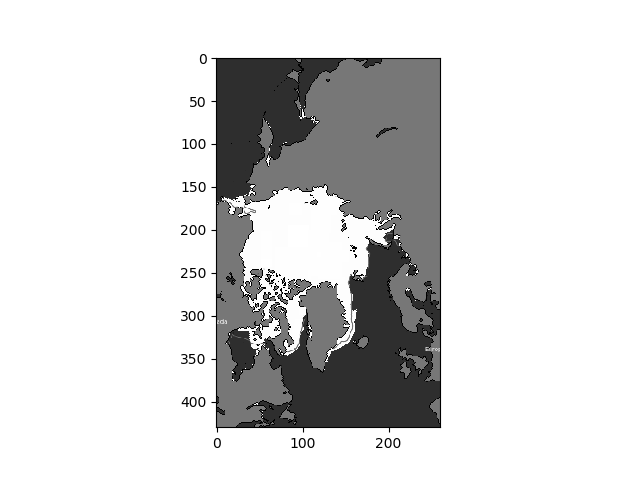

In [2]:
# Print inline figures that can be saved
%matplotlib notebook

#A = misc.imread('N_198111_extn_v2.1_edited.png')
A = imageio.imread('N_198111_extn_v2.1_edited.png')


# Convert to black and white
sea_ice_BW = 0.299*A[:, :, 0] + 0.587*A[:, :, 1] + 0.114*A[:, :, 2] 

# Crop to include only the central box
sea_ice_crop = sea_ice_BW[30:460, 50:310]

plt.figure()
plt.imshow(sea_ice_crop,cmap='gray')

### 2.3.1 Implement the edge detection algorithm

In [3]:
# Maximum discrepancy algorithm
def maximum_discrepancy(A):
    center = A[1,1]
    indicies = ((0,0),(0,1),(0,2),
                (1,0),      (1,2),
                (2,0),(2,1),(2,2))
    discrepancies = []
    for i in indicies:
        discrepancies.append(abs(center-A[i[0],i[1]]))
    return max(discrepancies)

In [4]:
# Edge detection algorithm
def getEdges(img,thresh=75):
    # Initialization
    edgeimg = np.zeros(img.shape)

    # Look for edges by looping over each pixel and checking if its 
    # maximum discrepancy is greater than the threshold value "thresh"
    for x in range(0,img.shape[0]-3):
        for y in range(0,img.shape[1]-3):
            max_dcrep = maximum_discrepancy(img[x:x+3,y:y+3])
            if max_dcrep >= thresh:
                edgeimg[x+1,y+1] = 255 #    max_dcrep #
                
    return edgeimg

In [5]:
# Get the new image of identified edges
#edgeimg0 = getEdges(sea_ice_clean,100)
edgeimg0 = getEdges(sea_ice_crop,100)

### 2.3.2 Display the pattern created from the original image. This is the image with the edge detected.

<IPython.core.display.Javascript object>


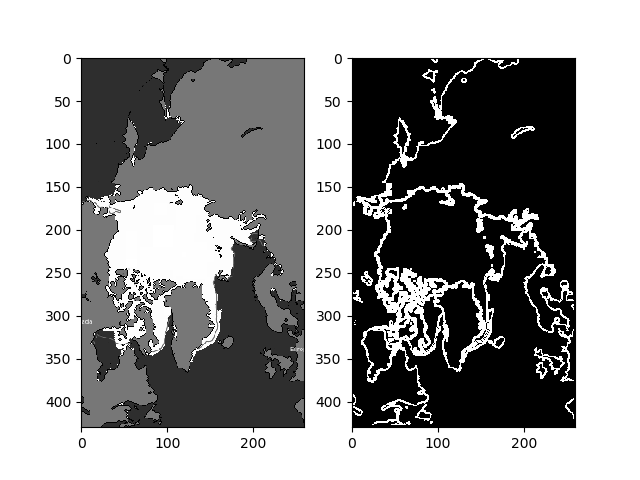

In [6]:
# Plot the results
plt.figure()
plt.subplot(121)
plt.imshow(sea_ice_crop,cmap='gray')

plt.subplot(122)
plt.imshow(edgeimg0,cmap='gray')



### 2.3.3. Use the edge detection algorithms that are part of the skimage filters

<IPython.core.display.Javascript object>


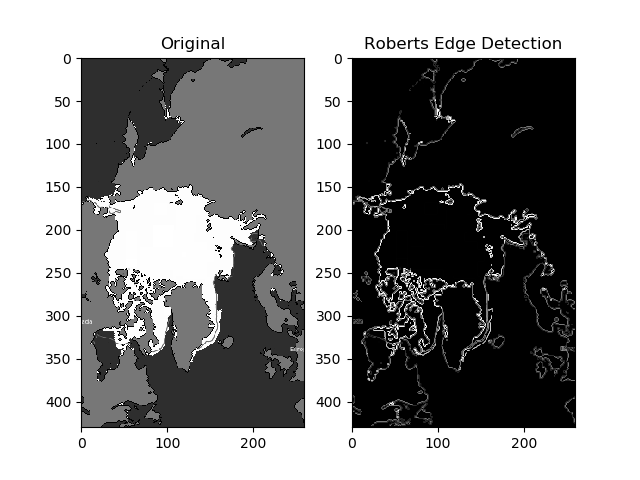

<IPython.core.display.Javascript object>


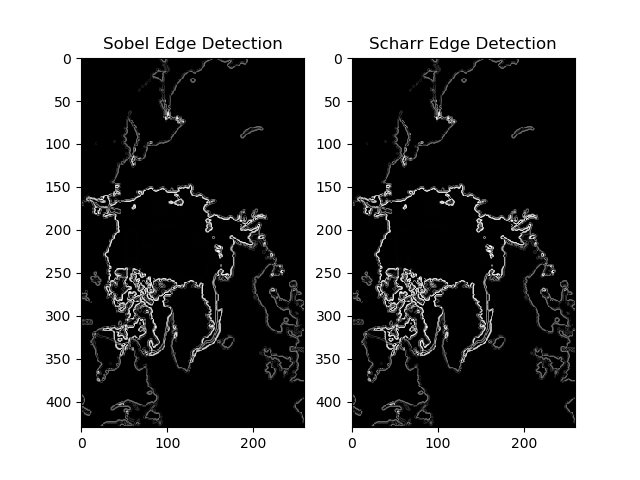

<IPython.core.display.Javascript object>


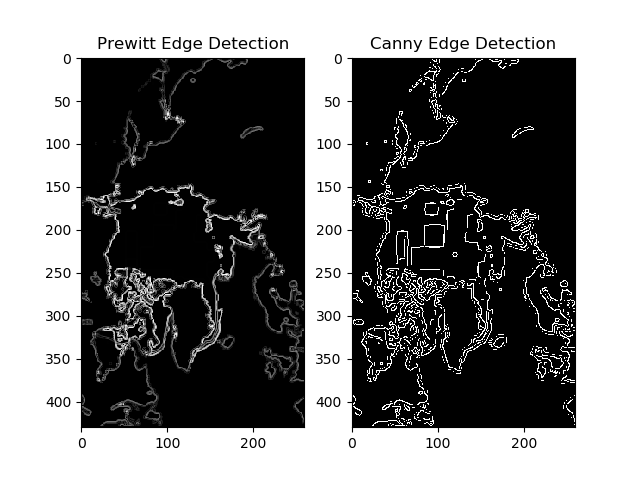

Text(0.5,1,'Canny Edge Detection')

In [7]:
# Recall that the possibilities for the filter are:
#  roberts, sobel, scharr, prewitt, canny

edge_roberts = roberts(sea_ice_crop)
edge_sobel = sobel(sea_ice_crop)
edge_scharr = scharr(sea_ice_crop)
edge_prewitt = prewitt(sea_ice_crop)
edge_canny = canny(sea_ice_crop)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(sea_ice_crop, cmap=plt.cm.gray)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(edge_roberts, cmap=plt.cm.gray)
plt.title('Roberts Edge Detection')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(edge_sobel, cmap=plt.cm.gray)
plt.title('Sobel Edge Detection')

plt.subplot(1,2,2)
plt.imshow(edge_scharr, cmap=plt.cm.gray)
plt.title('Scharr Edge Detection')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(edge_prewitt, cmap=plt.cm.gray)
plt.title('Prewitt Edge Detection')

plt.subplot(1,2,2)
plt.imshow(edge_canny, cmap=plt.cm.gray)
plt.title('Canny Edge Detection')

